In [39]:
import pandas as pd

df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [41]:
df.shape

(1000, 16)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [43]:
df.isna().sum().sum()

np.int64(91)

In [44]:
df = df.dropna()

In [45]:
df.isna().sum().sum()

np.int64(0)

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
import warnings
warnings.filterwarnings("ignore")

df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [48]:
df.describe(include=['object'])

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1000,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


In [49]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality','parental_education_level', 'internet_quality', 'extracurricular_participation']

In [50]:
for col in categorical_cols:
    print(f"Value count for {col}: \n {df[col].value_counts()}")

Value count for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Value count for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Value count for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Value count for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Value count for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Value count for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


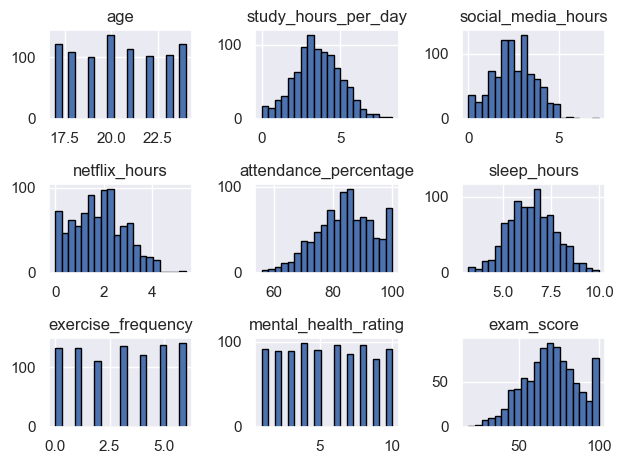

In [51]:
df.hist(bins=20, edgecolor='black',)
plt.tight_layout()
plt.show()

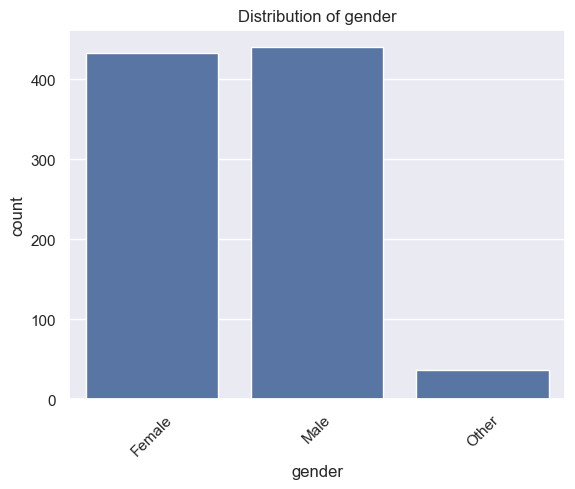

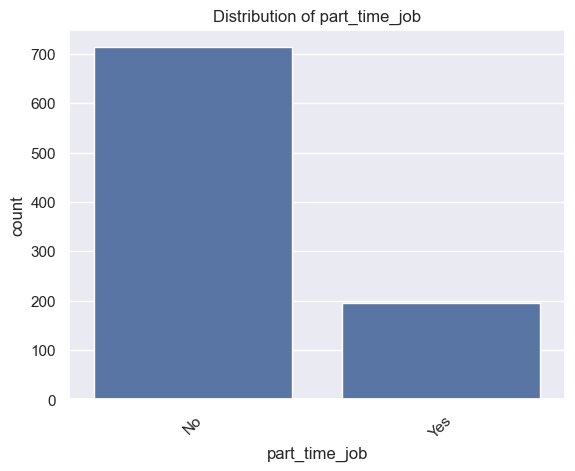

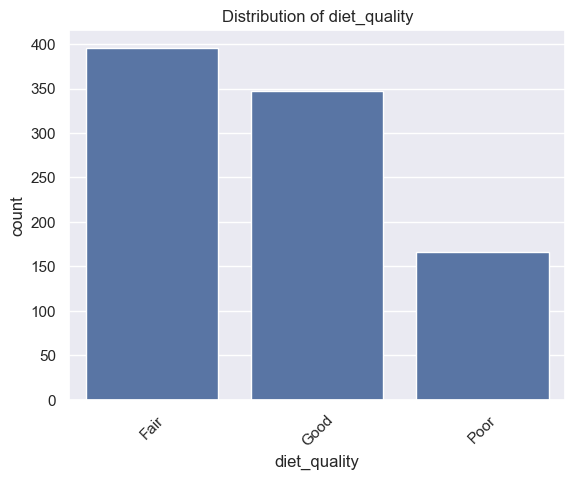

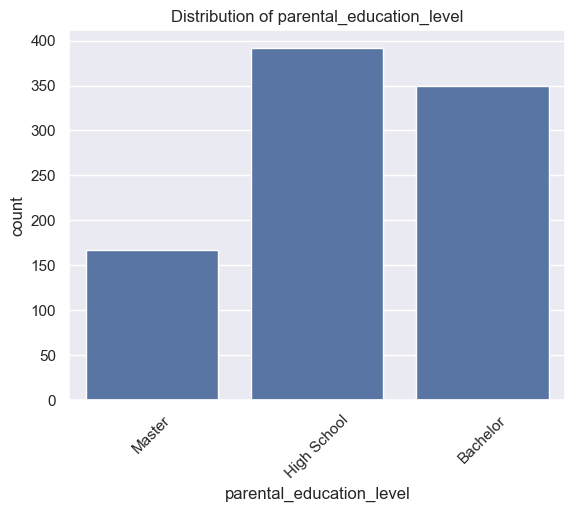

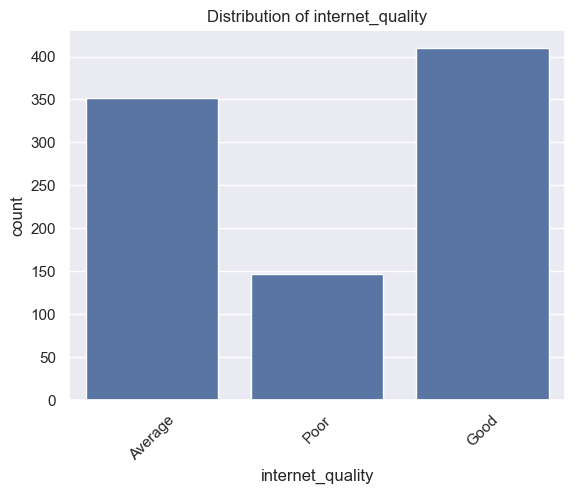

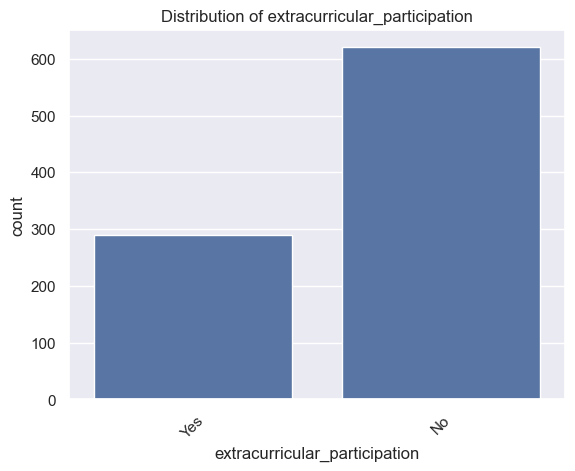

In [52]:
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

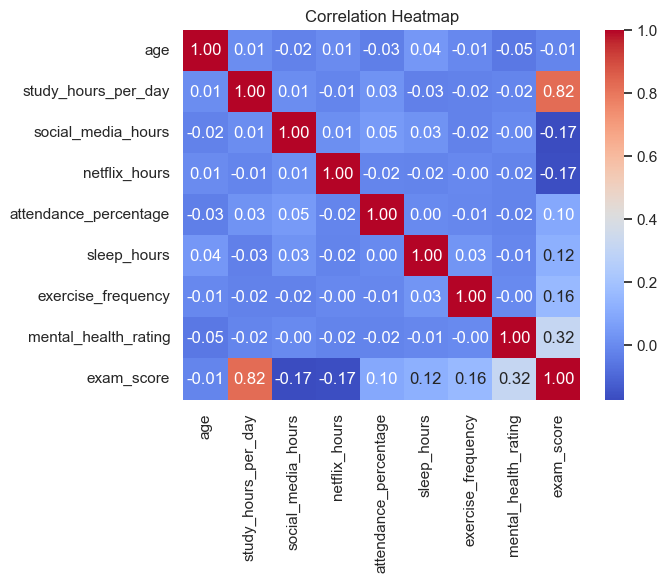

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [54]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [55]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

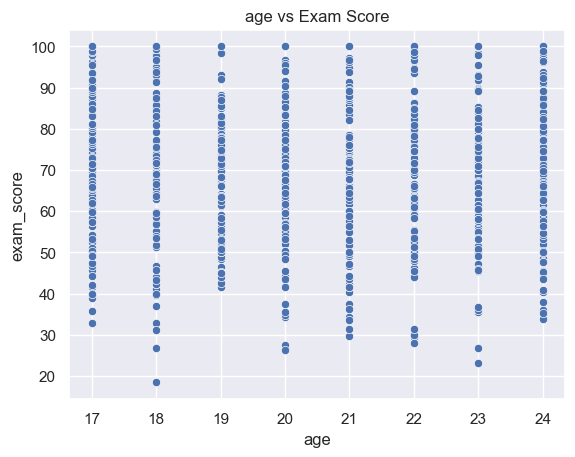

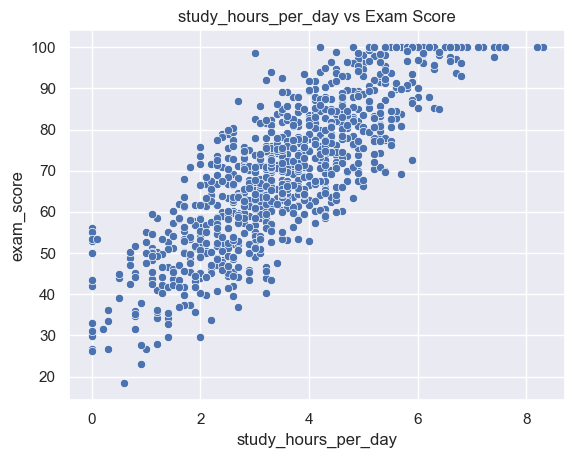

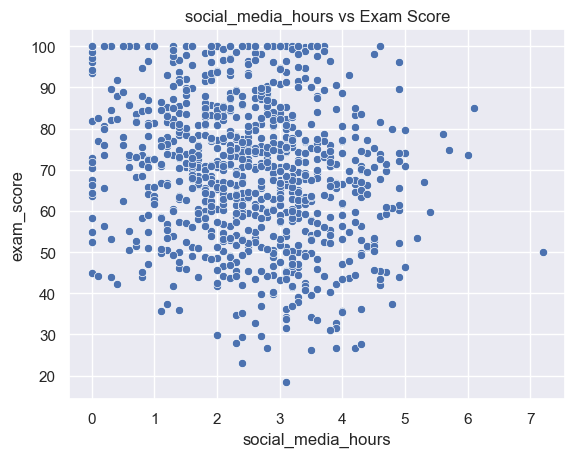

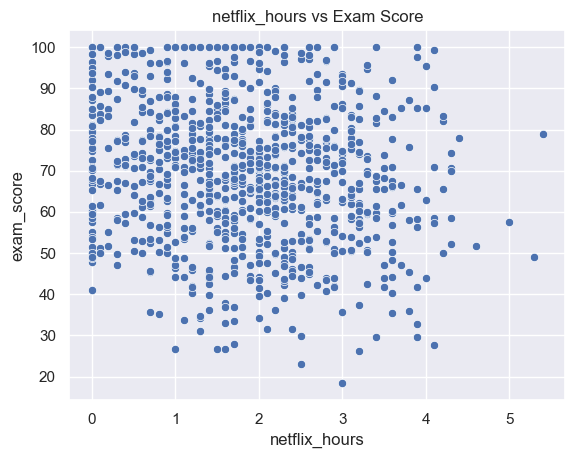

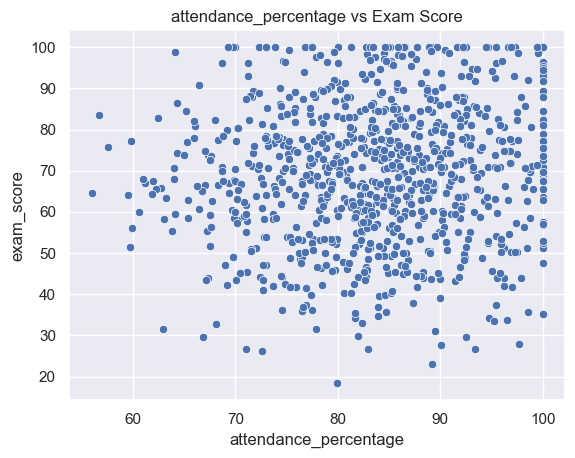

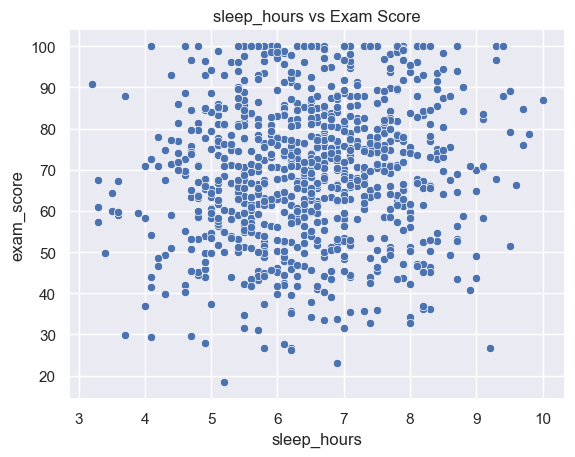

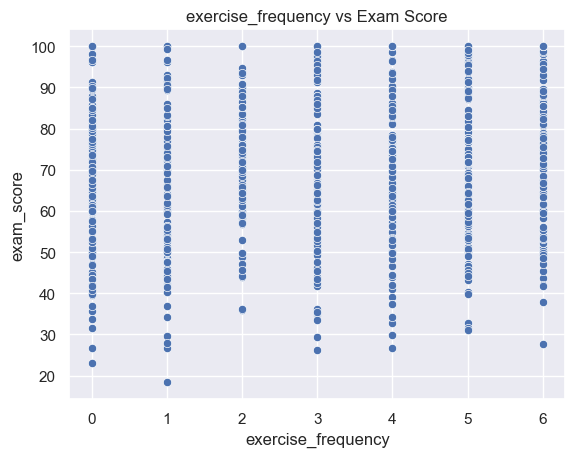

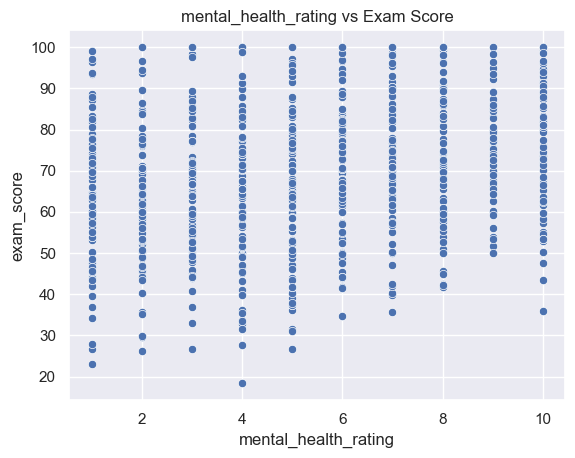

In [56]:
for feture in num_features :
    sns.scatterplot(data=df, x=feture, y='exam_score')
    plt.title(f"{feture} vs Exam Score")
    plt.show()

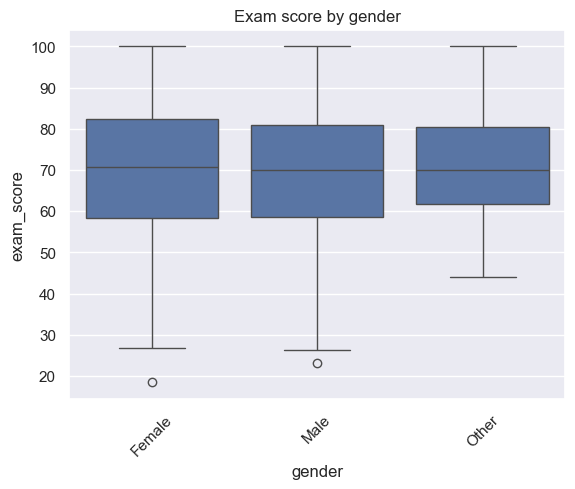

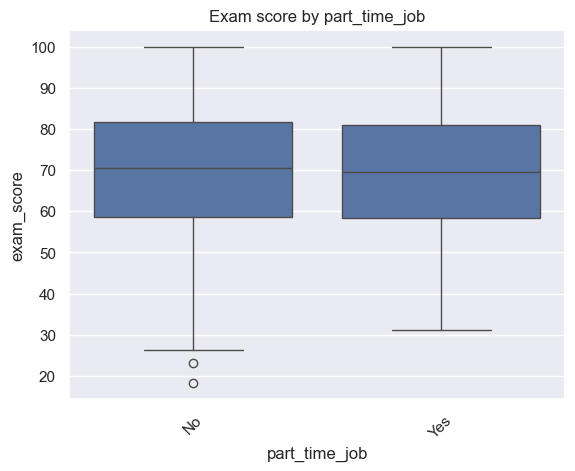

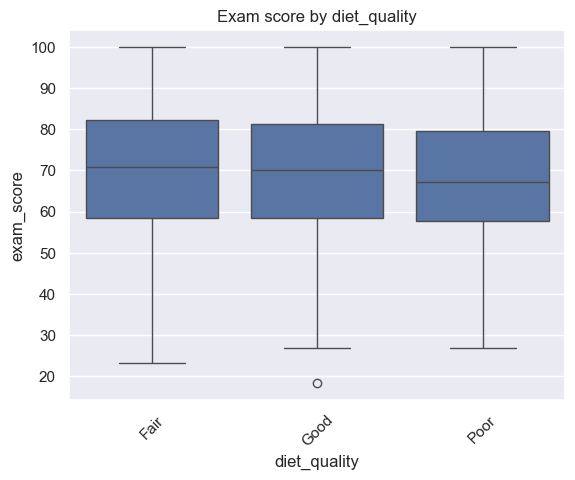

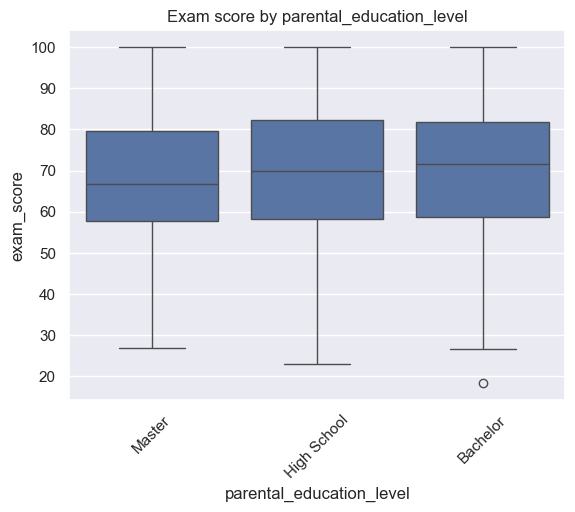

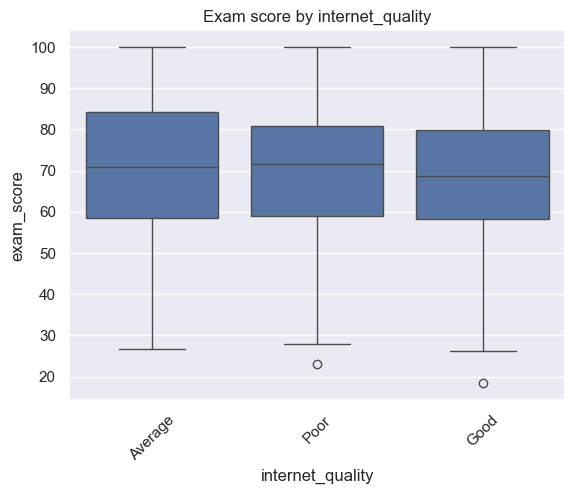

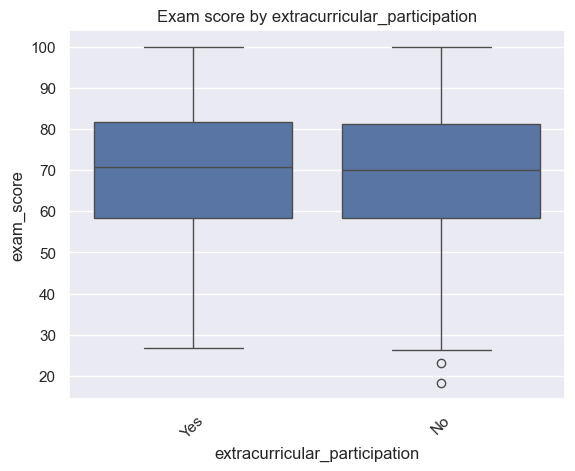

In [57]:
for col in categorical_cols:
    sns.boxplot(data=df, x=col, y="exam_score")
    plt.title(f"Exam score by {col}")
    plt.xticks(rotation=45)
    plt.show()

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [60]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [61]:
features = ["study_hours_per_day","attendance_percentage","mental_health_rating", "sleep_hours","part_time_job"]
target = "exam_score"

In [62]:
df_model = df[features + [target]].copy()
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [63]:
le = LabelEncoder()
df_model["part_time_job"] = le.fit_transform(df_model['part_time_job'])
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [64]:
x = df_model[features]
y = df_model[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(y_train), len(y_test)

(727, 182)

In [65]:
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [3,5,10], "min_samples_split": [2,5]}
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {"n_estimators": [50,100], "max_depth": [5,10]}
    }
}

In [66]:
best_models = []
for name, config in models.items():
    print(f"Training {name}...")

    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_mean_squared_error')
    grid.fit(x_train, y_train)

    y_pred = grid.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    best_models.append({
        "model" : name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2_score": r2
    })



Training LinearRegression...
Training DecisionTree...
Training RandomForest...


In [67]:
best_models

[{'model': 'LinearRegression',
  'best_params': {},
  'rmse': np.float64(7.273497305095927),
  'r2_score': 0.7932697182482296},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 5, 'min_samples_split': 5},
  'rmse': np.float64(8.49077531475645),
  'r2_score': 0.7182835356214181},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 10, 'n_estimators': 100},
  'rmse': np.float64(7.847285434609164),
  'r2_score': 0.7593663095719636}]

In [68]:
results_df = pd.DataFrame(best_models)
results_df.sort_values(by="rmse")

,model,best_params,rmse,r2_score
0,LinearRegression,{},7.273497,0.793270
2,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",7.847285,0.759366
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 5}",8.490775,0.718284


In [69]:
import joblib

best_row = results_df.sort_values(by="rmse").iloc[0]
best_row

model          LinearRegression
best_params                  {}
rmse                   7.273497
r2_score                0.79327
Name: 0, dtype: object

In [70]:
best_model_name = best_row['model']
best_model_name

'LinearRegression'

In [71]:
best_model_config = models[best_model_name]
best_model_config

{'model': LinearRegression(), 'params': {}}

In [72]:
final_model = best_model_config['model']
final_model.fit(x, y)

LinearRegression()

In [74]:
joblib.dump(final_model, 'student_performance_model.pkl')

['student_performance_model.pkl']

In [75]:
joblib.load('student_performance_model.pkl').predict(x_test)

array([ 75.85209083,  85.9407813 ,  82.72920286,  70.63722799,
        54.12381522,  81.73266078,  87.47666446, 101.05772654,
        53.35891573,  62.62439   ,  89.92801771,  82.19382145,
        69.88236463,  80.37605908,  71.00086671,  81.74485353,
        73.26225406,  49.82715484,  61.10409062,  57.8430186 ,
        66.59608214,  42.46689961,  55.89326092,  73.32456053,
        69.14617842,  70.71589384,  60.70117069, 101.49785175,
        74.66430702,  36.59323364,  78.2264766 ,  46.38528027,
        65.73770789,  57.8301418 ,  80.02826427,  64.1457298 ,
        93.5987542 ,  57.98993937,  78.89156923,  62.67344973,
        80.33218451,  86.93258518,  93.68221401,  76.90551635,
        40.85472813,  86.30137744,  63.08783432,  72.41928765,
        50.15515284,  85.35394269,  47.70223942,  71.48891272,
        58.59515015,  82.27551134,  83.87763264,  97.71483999,
        79.98469099,  76.0390916 ,  88.10129326,  40.0082463 ,
        63.09414629,  55.78485738,  73.63145597,  56.50